# Setup

*This example is taken from [Keras\' basic classifier](https://www.tensorflow.org/tutorials/keras/basic_classification)*.

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

### Use the Fashion MNIST dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

These are the different classes in our dataset, i.e. the categories (types) of clothes our model will cover:

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### A Sample Image
A sample image is a 28x28 px square with values in (0, 255).

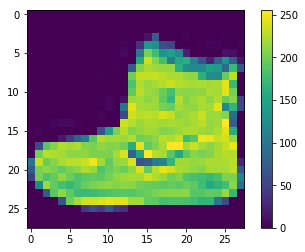

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()

We need to convert the 255 values to a (0..1) range.

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## 25 Sample images with their class name

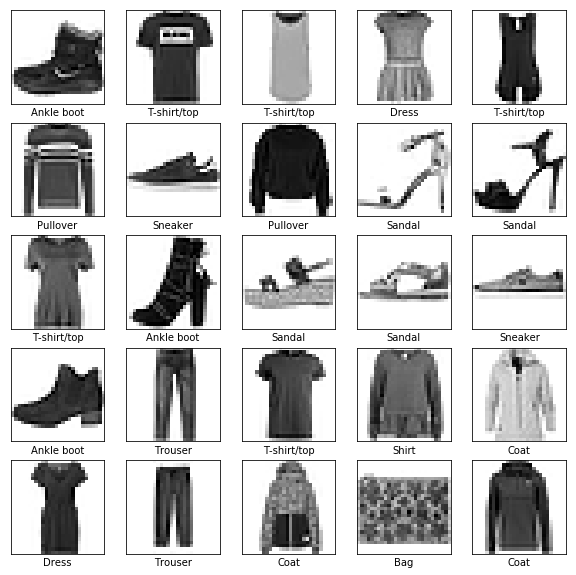

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
 

# Layers

### First layer - Flattener

We start by flattening the images. The result will be a 1D vector of 784 (28\*28) elements.

In [8]:
flat = keras.layers.Flatten(input_shape=(28, 28))

### Second Layer - reLU

A 128-node layer with a [Rectifier](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) function.

In [11]:
relu = keras.layers.Dense(128, activation=tf.nn.relu)

### Third Layer - Softmax

The last layer is a 10-node softmax layer that gives us the probability of belonging to a specific class

In [12]:
squasher = keras.layers.Dense(10, activation=tf.nn.softmax)

# The Model

In [13]:
model = keras.Sequential([flat, relu, squasher])

### Compilation

In [14]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training

We will do 15 passes (`epochs`) over the dataset. The final accuracy should be ~93% on the training data.

In [15]:
model.fit(train_images, train_labels, epochs=15)

Epoch 1/15
60000/60000 [==============================] - 2s 35us/step - loss: 0.4962 - acc: 0.8266
Epoch 2/15
60000/60000 [==============================] - 2s 32us/step - loss: 0.3767 - acc: 0.8644
Epoch 3/15
60000/60000 [==============================] - 2s 33us/step - loss: 0.3383 - acc: 0.8770
Epoch 4/15
60000/60000 [==============================] - 2s 32us/step - loss: 0.3132 - acc: 0.8844
Epoch 5/15
60000/60000 [==============================] - 2s 33us/step - loss: 0.2939 - acc: 0.8926
Epoch 6/15
60000/60000 [==============================] - 2s 33us/step - loss: 0.2821 - acc: 0.8953
Epoch 7/15
60000/60000 [==============================] - 2s 33us/step - loss: 0.2673 - acc: 0.9014
Epoch 8/15
60000/60000 [==============================] - 2s 33us/step - loss: 0.2588 - acc: 0.9030
Epoch 9/15
60000/60000 [==============================] - 2s 33us/step - loss: 0.2480 - acc: 0.9080
Epoch 10/15
60000/60000 [==============================] - 2s 33us/step - loss: 0.2384 - acc: 0.9113

We now test it against the test data. The accuracy should be around 88%.

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 22us/step
Test accuracy: 0.8864


**Note**: The 93% accuracy on training data vs. 88% on the test data tells us that we're overfitting (we're sticking too much to the properties of the training dataset instead of finding generalizations that apply to any example).

# Predictions

We create predictions for all the test images

In [17]:
predictions = model.predict(test_images)

In [18]:
predictions[0]

array([7.5628964e-07, 5.6338195e-10, 2.8810102e-10, 2.4671611e-13,
       3.6453363e-10, 1.6267157e-04, 9.2961838e-10, 4.6329419e-03,
       3.6938367e-08, 9.9520361e-01], dtype=float32)

We can see which class the first item belongs to:

In [47]:
class_names[np.argmax(predictions[0])]

'Ankle boot'

And the probability for this item:

In [52]:
predictions[0][np.argmax(predictions[0])] * 100.0

99.52036142349243

Each element of `predictions` gives us a probability that an image falls in a specific bucket. In this case we can see the item at the 10th position has the highest match (~99.5%).


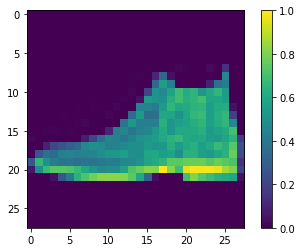

In [23]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()

Another example, this time with the 21th item of the test set:

In [53]:
hoodie = test_images[20]

`model.predict` expects a collection so we need to expand the dimension (create a collection) for our item:

In [54]:
img = (np.expand_dims(hoodie, 0))

In [55]:
prediction = model.predict(img)

In [56]:
print(prediction)

[[3.0021099e-03 3.4315002e-07 9.9556512e-01 3.9809248e-07 5.2281865e-04
  1.4087019e-06 8.6527213e-04 2.0698747e-09 4.2525466e-05 8.1586728e-09]]


In [44]:
class_names[np.argmax(prediction)]

'Pullover'

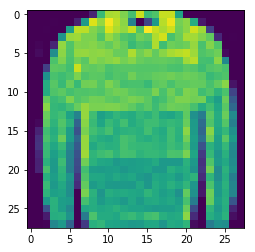

In [45]:
plt.figure()
plt.imshow(hoodie)